In [1]:
import evaluators
import preprocessors
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA

# hide warnings
import warnings 
warnings.filterwarnings("ignore")


In [2]:
import os
import platform

def beep():
    if platform.system() == "Windows":
        import winsound
        winsound.Beep(1000, 500)  # frequency (Hz), duration (ms)

# Experiment 1 - ARIMA model no tuning

In [3]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [4]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)
beep()

In [5]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
dtws = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 97.13244210396272
Median sktime DTW distance for feature O2Sat: 9.550897668042039
Median sktime DTW distance for feature SBP: 353.99731330881735
Median sktime DTW distance for feature MAP: 204.36694224227773
Median sktime DTW distance for feature DBP: 82.47499470872226
Median sktime DTW distance for feature Resp: 35.32351153445662
Median sktime DTW distance for feature Temp: 0.13080430105032953


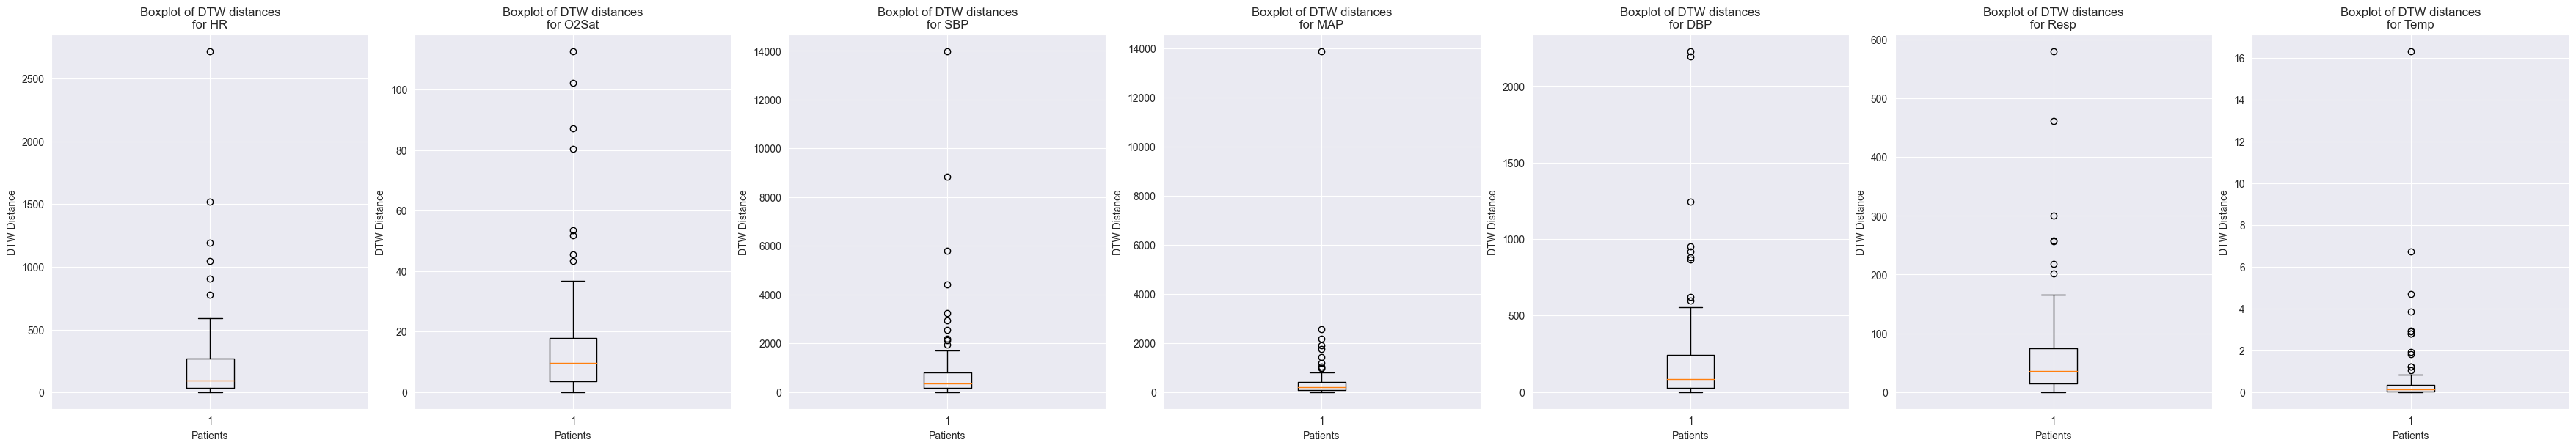

In [6]:
myEvaluator.box_plot_dtw(dtws)

# Experiment 2 - AutoARIMA model

In [7]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [9]:
model = AutoARIMA(seasonal=False, max_order=50, suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)
beep()

In [10]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 99.38792817315031
Median sktime DTW distance for feature O2Sat: 9.391750714923349
Median sktime DTW distance for feature SBP: 321.1324915028912
Median sktime DTW distance for feature MAP: 225.2071280991729
Median sktime DTW distance for feature DBP: 67.13485569414358
Median sktime DTW distance for feature Resp: 33.57963926309864
Median sktime DTW distance for feature Temp: 0.08000000000000228


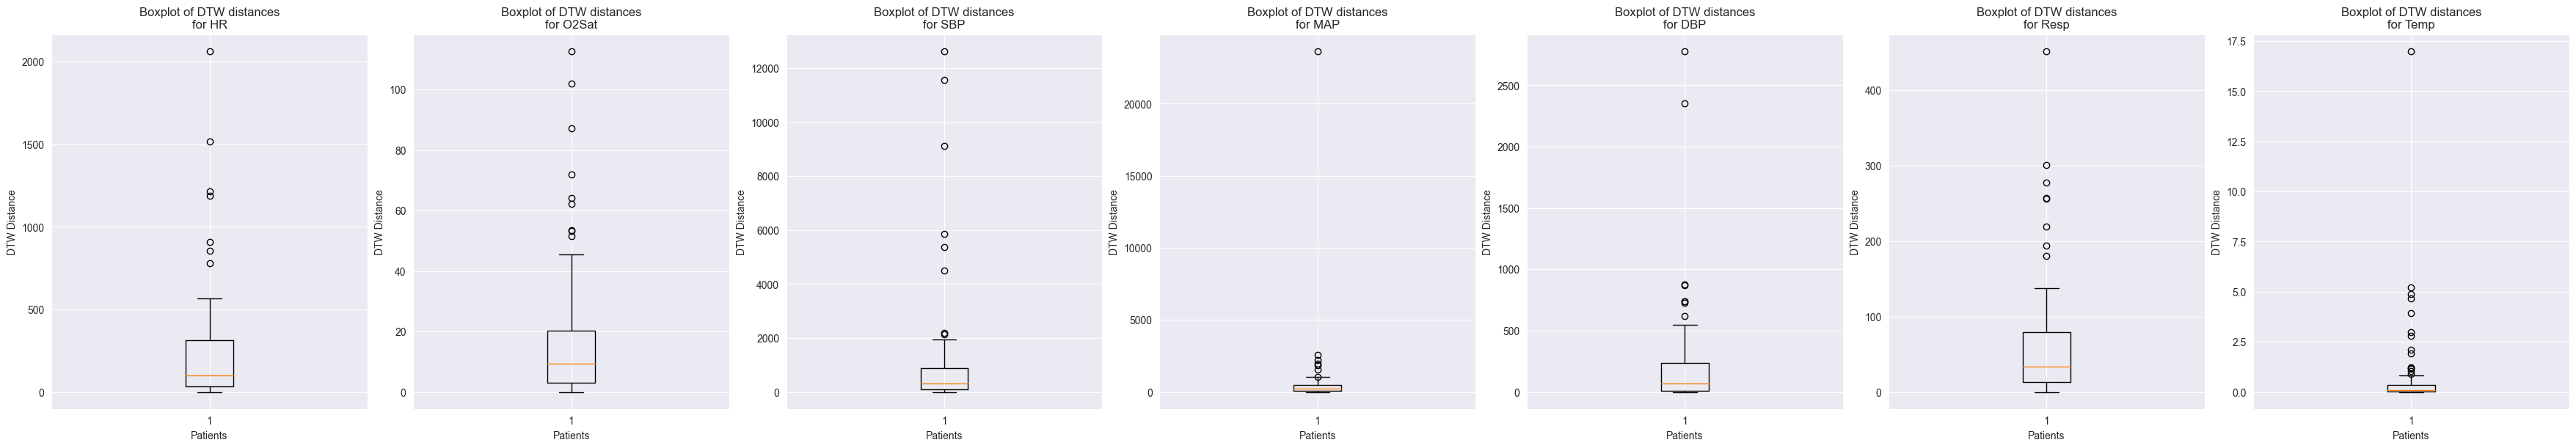

In [11]:
myEvaluator.box_plot_dtw(results)

# Experiment 3 - ARIMA with Exogenous input

In [12]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR", 'O2Sat', 'MAP', 'DBP', 'Resp', 'Temp'], ['SBP'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [13]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)
beep()

In [14]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 111.13567170381617
Median sktime DTW distance for feature O2Sat: 8.130536735622599
Median sktime DTW distance for feature MAP: 62.48305828630696
Median sktime DTW distance for feature DBP: 33.32518506350251
Median sktime DTW distance for feature Resp: 34.057795858873284
Median sktime DTW distance for feature Temp: 0.09743001795210479


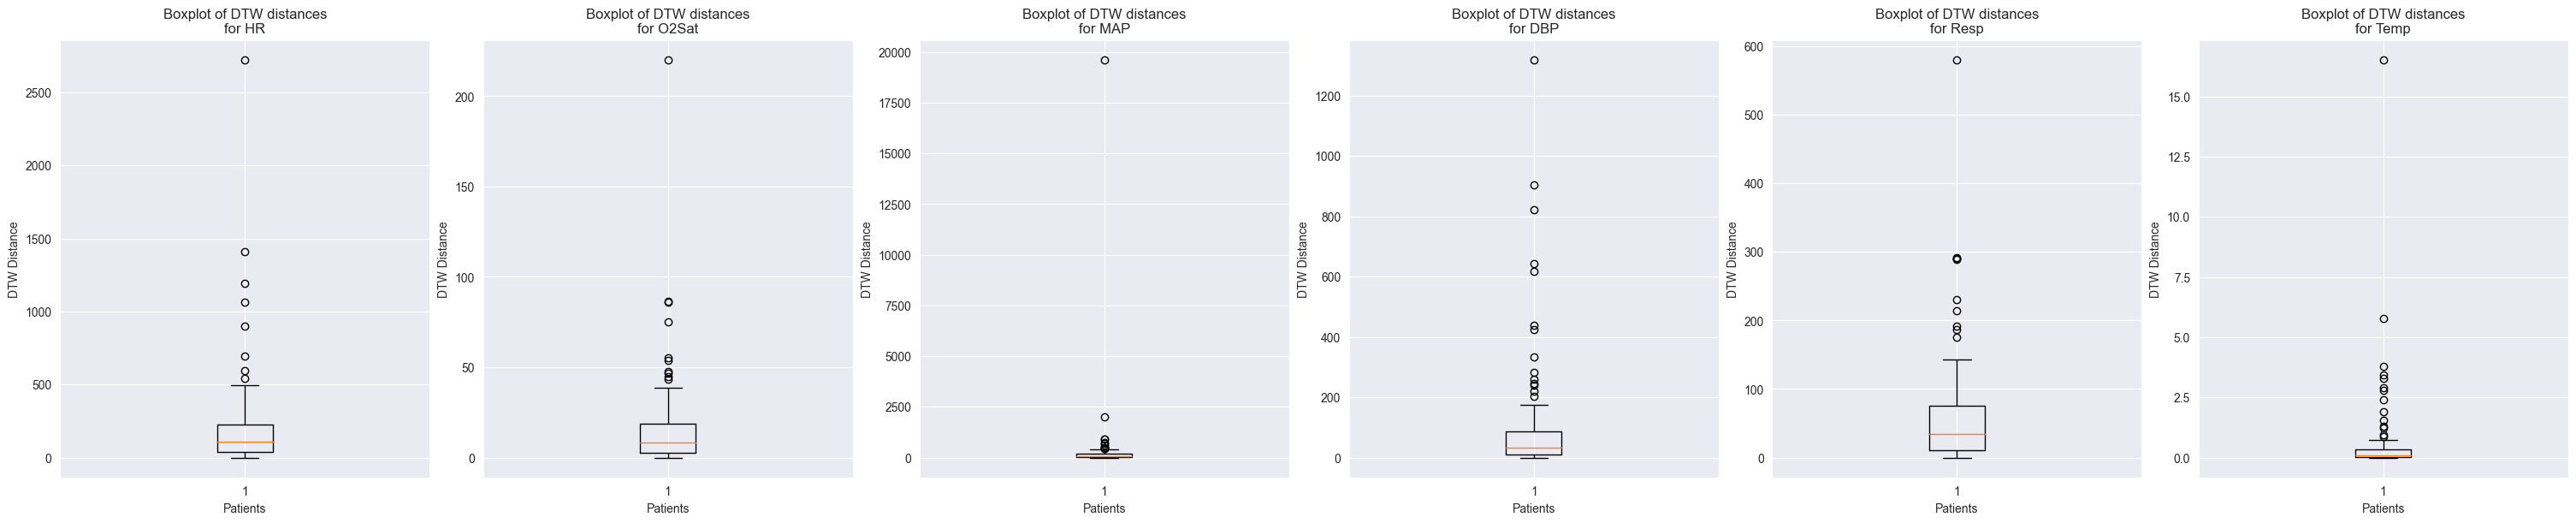

In [15]:
myEvaluator.box_plot_dtw(results)

# Experiment 4 - ARIMA manual tuning

In [16]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [17]:
model = ARIMA(order= (1, 1, 0), maxiter=100,suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)
beep()

In [18]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 104.4123504413976
Median sktime DTW distance for feature O2Sat: 8.956735691311621
Median sktime DTW distance for feature SBP: 346.90642072807157
Median sktime DTW distance for feature MAP: 251.57535302324922
Median sktime DTW distance for feature DBP: 79.19978214725951
Median sktime DTW distance for feature Resp: 38.746659550378375
Median sktime DTW distance for feature Temp: 0.07950228972172459


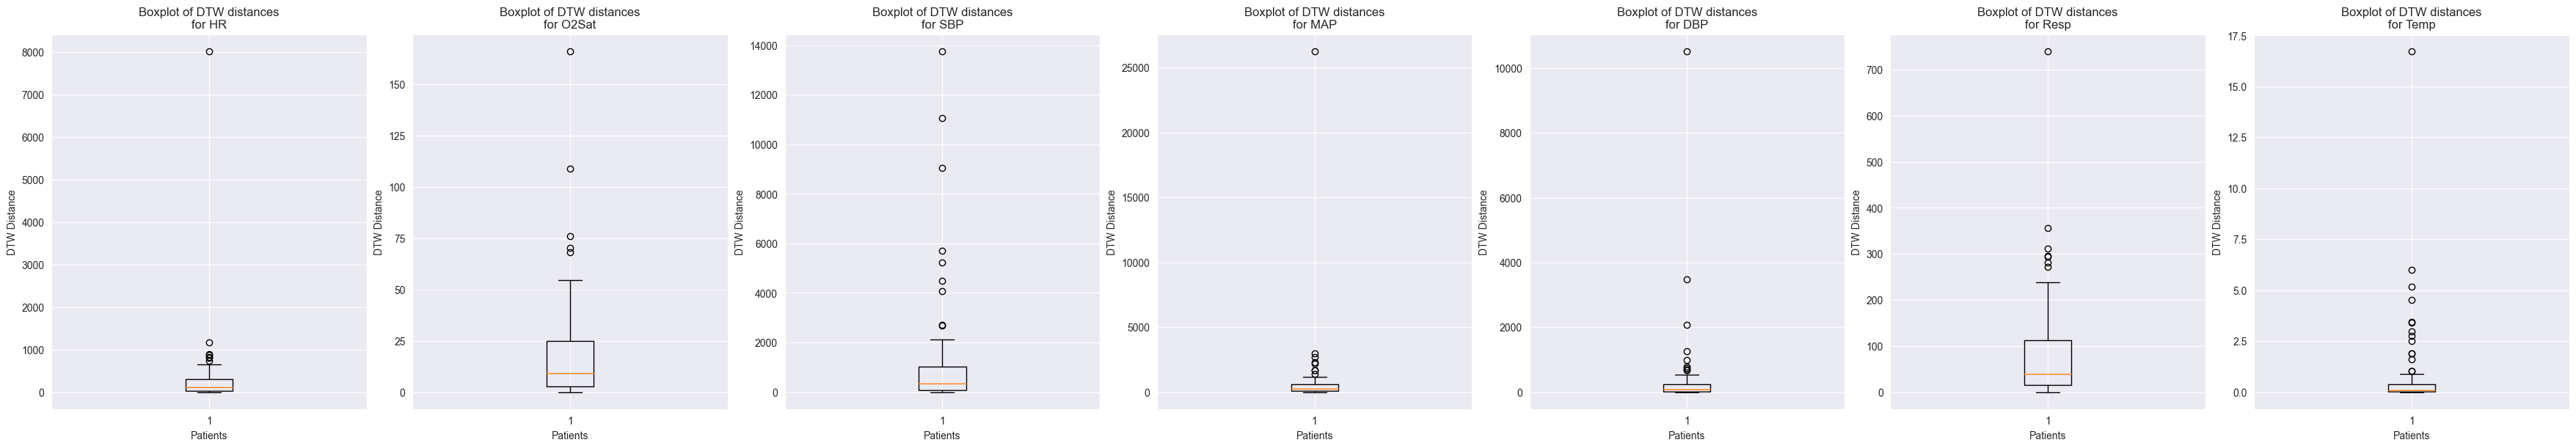

In [19]:
myEvaluator.box_plot_dtw(results)

# Experiment 5 - ARIMA with Exogenous input HR

In [20]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'], ['HR'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [21]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)
beep()

In [22]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature O2Sat: 7.139407267795917
Median sktime DTW distance for feature SBP: 330.16495302024566
Median sktime DTW distance for feature MAP: 183.56255714917478
Median sktime DTW distance for feature DBP: 80.30038562370989
Median sktime DTW distance for feature Resp: 29.71096690028122
Median sktime DTW distance for feature Temp: 0.10728077578334183


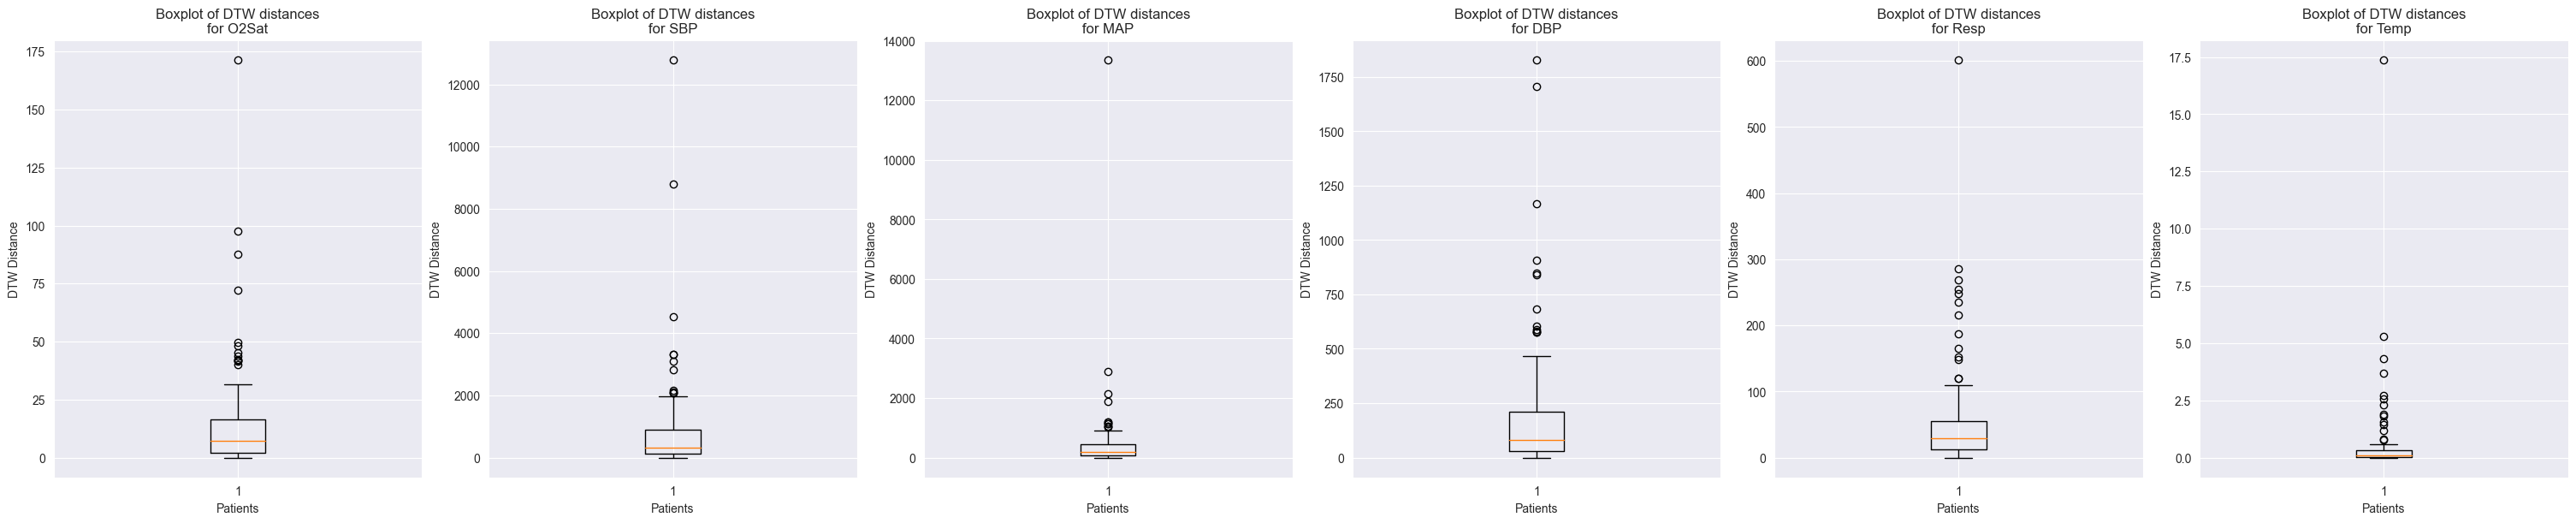

In [23]:
myEvaluator.box_plot_dtw(results)